In [ ]:
%pip install networkx
%pip install numpy
%pip install matplotlib
%pip install scipy

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
import random

from graph import *
from walking import *
from plotter import *
from cluster_erdos import *

# Custom graph example

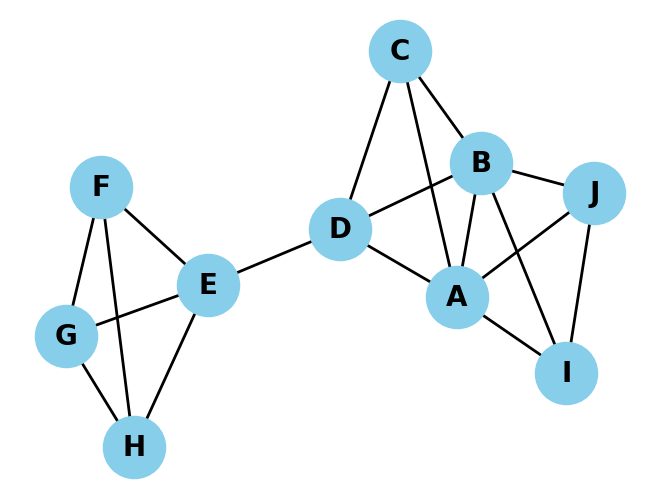

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
edges = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('E', 'G'), ('E', 'H'), ('F', 'G'), ('F', 'H'), ('G', 'H'), ('I', 'J'), ('I', 'A'), ('I', 'B'), ('J', 'A'), ('J', 'B')]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=20, font_weight='bold', font_color='black', edge_color='black', width=2, edge_cmap=plt.cm.Blues)

# ERDOS GRAPH generator

In [ ]:
from plotter import *
from networkx import erdos_renyi_graph

n = 10
p = 0.5

G = erdos_renyi_graph(n, p, seed=None, directed=False)
plot_erdos_graph(G, n, p)

# Create an ER graph

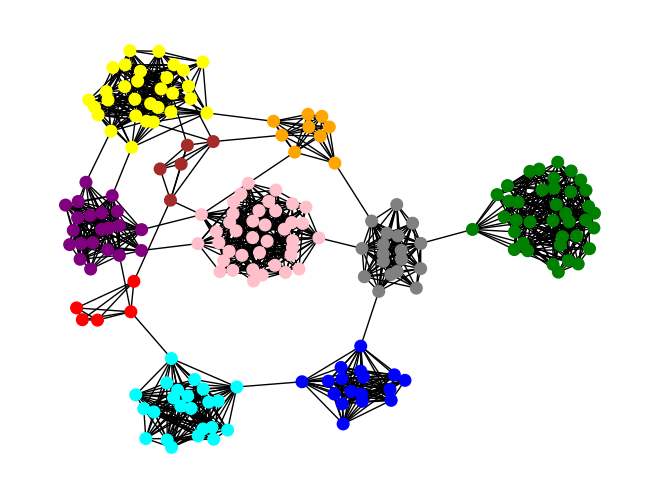

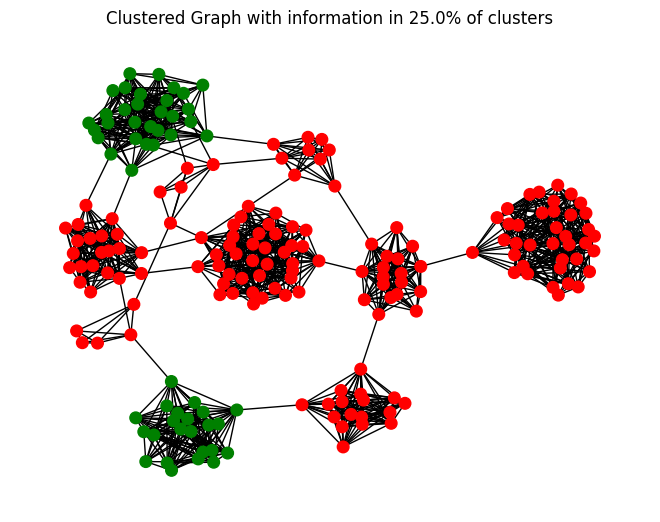

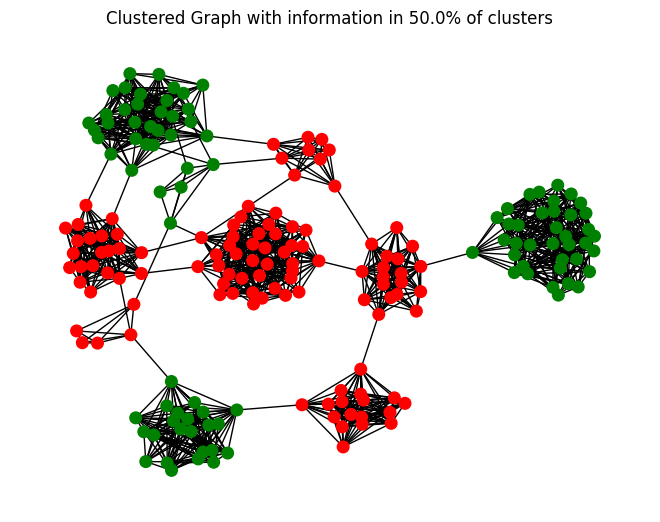

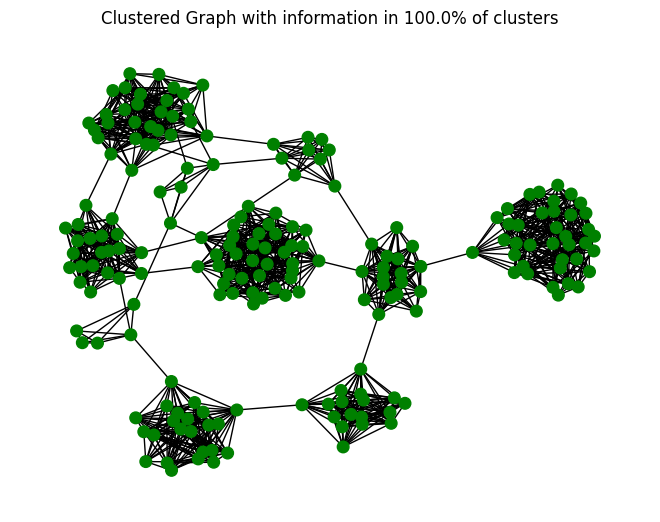

In [6]:
from graph import *
from plotter import *
import copy

n_clusters = 10
avg_cl_size = 15
mean_intra_cl_edges = 7  # 7
mean_inter_cl_edges = 2  # 2
n_tests = 1

# Create a graph
G = graph_erdos(n_clusters, avg_cl_size, \
    mean_intra_cl_edges, mean_inter_cl_edges, n_tests)
# modify_graph_information(G, 0.5)

# plot_graph(G)
plot_graph_colored(G)

# plot_graph_colored_by_info(G)

perc_cl_info = [0.25, 0.5, 1.0]

for index, perc_cl in enumerate(perc_cl_info):
    G_copy = copy.deepcopy(G)

    if index == 0:
        G_copy, prev_clusters = graph_add_information(G_copy, perc_cl, None, 0)
    else:
        G_copy, prev_clusters = graph_add_information(G_copy, perc_cl, prev_clusters, perc_cl_info[index-1])

    plot_graph_colored_by_info(G_copy, perc_cl)


# Walks on ERDOS

# MEAN, VAR, STD

## RandomWalk, PageRank, ARS

In [ ]:
import copy

from graph import *
from walking import *
from plotter import *


n_clusters = 50
avg_cl_size = 50
mean_intra_cl_edges = 7
mean_inter_cl_edges = 2
n_tests = 100

# Create a graph
G = graph_erdos(n_clusters, avg_cl_size, mean_intra_cl_edges, mean_inter_cl_edges, n_tests)

n_nodes = G.number_of_nodes()
# n_steps = 100
n_steps = 2 * n_nodes

# graph_add_information(G, 0.125)
graph_add_information(G, 0.35)

G_copy = copy.deepcopy(G)
G_copy2 = copy.deepcopy(G)

total_info = G.graph['total_information']

random_walk_results = []
ars_walk_results = []
pagerank_walk_results = []

for test in range(n_tests):
    random_walk_results.append(random_walk(G, test, n_steps))
    ars_walk_results.append(ars_walk(G_copy, test, n_steps))
    pagerank_walk_results.append(pagerank_walk(G_copy2, test, n_steps))

simulation_parameters = [n_clusters, n_nodes, n_tests]

plot_3methods(simulation_parameters, random_walk_results, ars_walk_results, pagerank_walk_results, total_info, "RandomWalk", "ARS", "PageRank")

# ARS: variable steps to jump and percentage

In [ ]:
import numpy as np
import copy
from graph import *
from walking import *
from plotter import *


n_clusters = 50
avg_cl_size = 50
mean_intra_cl_edges = 7
mean_inter_cl_edges = 2
n_tests = 100

G = graph_erdos(n_clusters, avg_cl_size, mean_intra_cl_edges, mean_inter_cl_edges, n_tests)
n_nodes = G.number_of_nodes()
# plot_graph(G)

print("Clusters: ", n_clusters)
print("Nodes: ", n_nodes)
print("Tests: ", n_tests)

total_steps = 2 * n_nodes
taus = list(range(0, 1 + total_steps, total_steps//20)) + [3, 10]
# steps_to_jump = range(0, 21, 1)


# añadir steps_to_jump a mano
taus = np.sort(taus)


# perc_cl_info = [0.125, 0.25, 0.375, 0.5, 0.75, 1.0]
perc_cl_info = [0.125, 0.375, 0.75, 1.0]

ars_walk_results = {perc_cl: {steps: [] for steps in taus} for perc_cl in perc_cl_info}

for index, perc_cl in enumerate(perc_cl_info):
    G_copy = copy.deepcopy(G)

    if index == 0:
        G_copy, prev_clusters = graph_add_information(G_copy, perc_cl, None, 0)
    else:
        G_copy, prev_clusters = graph_add_information(G_copy, perc_cl, prev_clusters, perc_cl_info[index-1])

    # print(perc_cl, prev_clusters)
    # plot_graph_colored_by_info(G_copy)

    for steps in taus:
        G_copy_2 = copy.deepcopy(G_copy)

        for test in range(n_tests):
            ars_walk_results[perc_cl][steps].append(ars_walk(G_copy_2, test, total_steps, steps))

        mean = np.mean(ars_walk_results[perc_cl][steps], axis=0)
        ars_walk_results[perc_cl][steps] = mean

simulation_parameters = [n_clusters, n_nodes, n_tests]

# when using large steps
steps_to_plot = [0, 3, 10, taus[1], taus[(len(taus)//2) + 1], taus[-1]]
# steps_to_plot = np.sort(steps_to_plot)

# when using small steps
# steps_to_plot = [0, steps_to_jump[3], steps_to_jump[len(steps_to_jump)//2], steps_to_jump[-1]]

plot_ars_by_steps_to_jump_and_perc_cl_info(simulation_parameters, ars_walk_results, steps_to_plot)
plot_ars_by_steps_to_jump_and_perc_cl_info_no_legend(simulation_parameters, ars_walk_results, steps_to_plot)
plot_total_information_gained_by_steps_and_perc_cl_info(simulation_parameters, ars_walk_results)
plot_all_percs_in_one(simulation_parameters, ars_walk_results)
